In [31]:
#Importing all the necessary Libraries
import numpy as np 
import pandas as pd 
import pywt
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import tensorflow
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense,Activation, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Embedding
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.models import Model

from keras.layers.merge import concatenate


In [32]:
#Attach the path to your dataset.
df=pd.read_csv('D:/Ear-Stimuli/eardataset.csv')
df=pd.read_csv('eardataset.csv', encoding = "ISO-8859-1")

In [33]:
#creating a dataFrame for the dataset
def subject0(subjectno, sessionno, earname, bufferid):
    dfu0=df.groupby(['subject', 'session', 'ear', 'buffer']).get_group((subjectno, sessionno, earname, bufferid)).iloc[-10:]
    return dfu0

x=subject0(34,0,'left','B')
x['subject'].iloc[0]
print(x.shape)
print(x)

(10, 666)
      unnamed  subject  session   ear buffer  block    data_0    data_1  \
2730    30662       34        0  left      B    272  0.000014  0.000013   
2731    30663       34        0  left      B    273  0.000014  0.000013   
2732    30664       34        0  left      B    274  0.000014  0.000013   
2733    30665       34        0  left      B    275  0.000015  0.000014   
2734    30666       34        0  left      B    276  0.000014  0.000013   
2735    30667       34        0  left      B    277  0.000014  0.000014   
2736    30668       34        0  left      B    278  0.000014  0.000014   
2737    30669       34        0  left      B    279  0.000013  0.000013   
2738    30670       34        0  left      B    280  0.000014  0.000014   
2739    30671       34        0  left      B    281  0.000015  0.000014   

        data_2    data_3  ...  data_650  data_651  data_652  data_653  \
2730  0.000013  0.000013  ...  0.000013  0.000012  0.000011  0.000011   
2731  0.000013  0.

In [34]:
#Creating Input and Labels DataFrame

allInputTEOAEsignalsAllSubjects = pd.DataFrame([])
allOutputLabelsAllSubjects = pd.DataFrame([])
for a in range(54):
    print(a)
    df1 = pd.DataFrame([])
    b=[0,1]              # sessions 0 and 1
    c=['left','right']   # ears 
    d=['A','B']          # buffers
    
    allFeatures =  pd.DataFrame([])
    allInputFeatures =  pd.DataFrame([])
    outputLabel =  pd.DataFrame([])
    fftValues =  pd.DataFrame([])
    psdValues =  pd.DataFrame([])
    autocorrValues = pd.DataFrame([])
        
    for q,r,s in [(q,r,s) for q in b for r in c for s in d]:
        
        # df1 contains all the 80 TEOAE signals of subject a
        df1 = df1.append(subject0(a,q,r,s))
        allInputFeatures = df1.iloc[:,6:]
    
    allInputTEOAEsignalsAllSubjects = pd.concat([allInputTEOAEsignalsAllSubjects.reset_index(drop=True),
                                                 allInputFeatures.reset_index(drop=True)], axis=0)
    # the following gets you the class label <= subject no.[0,1,2,...,53]
    outputLabel = df1.iloc[:,1] 
    print("OutputLabel:",outputLabel)
    #allOutputLabelsAllSubjects = allOutputLabelsAllSubjects.append(outputLabel)
    #append didn't work for output so using pd.cat instead
    allOutputLabelsAllSubjects = pd.concat([allOutputLabelsAllSubjects.reset_index(drop=True),
                                            outputLabel.reset_index(drop=True)], axis=0)
    print(allInputTEOAEsignalsAllSubjects.shape)
    print(allOutputLabelsAllSubjects.shape)


0
OutputLabel: 0     0
1     0
2     0
3     0
4     0
     ..
75    0
76    0
77    0
78    0
79    0
Name: subject, Length: 80, dtype: int64
(80, 660)
(80, 1)
1
OutputLabel: 80     1
81     1
82     1
83     1
84     1
      ..
155    1
156    1
157    1
158    1
159    1
Name: subject, Length: 80, dtype: int64
(160, 660)
(160, 1)
2
OutputLabel: 160    2
161    2
162    2
163    2
164    2
      ..
235    2
236    2
237    2
238    2
239    2
Name: subject, Length: 80, dtype: int64
(240, 660)
(240, 1)
3
OutputLabel: 240    3
241    3
242    3
243    3
244    3
      ..
315    3
316    3
317    3
318    3
319    3
Name: subject, Length: 80, dtype: int64
(320, 660)
(320, 1)
4
OutputLabel: 320    4
321    4
322    4
323    4
324    4
      ..
395    4
396    4
397    4
398    4
399    4
Name: subject, Length: 80, dtype: int64
(400, 660)
(400, 1)
5
OutputLabel: 400    5
401    5
402    5
403    5
404    5
      ..
475    5
476    5
477    5
478    5
479    5
Name: subject, Length: 80, dt

OutputLabel: 3520    44
3521    44
3522    44
3523    44
3524    44
        ..
3595    44
3596    44
3597    44
3598    44
3599    44
Name: subject, Length: 80, dtype: int64
(3600, 660)
(3600, 1)
45
OutputLabel: 3600    45
3601    45
3602    45
3603    45
3604    45
        ..
3675    45
3676    45
3677    45
3678    45
3679    45
Name: subject, Length: 80, dtype: int64
(3680, 660)
(3680, 1)
46
OutputLabel: 3680    46
3681    46
3682    46
3683    46
3684    46
        ..
3755    46
3756    46
3757    46
3758    46
3759    46
Name: subject, Length: 80, dtype: int64
(3760, 660)
(3760, 1)
47
OutputLabel: 3760    47
3761    47
3762    47
3763    47
3764    47
        ..
3835    47
3836    47
3837    47
3838    47
3839    47
Name: subject, Length: 80, dtype: int64
(3840, 660)
(3840, 1)
48
OutputLabel: 3840    48
3841    48
3842    48
3843    48
3844    48
        ..
3915    48
3916    48
3917    48
3918    48
3919    48
Name: subject, Length: 80, dtype: int64
(3920, 660)
(3920, 1)
49
Outpu

In [35]:
# save extracted dataframe locally
X=pd.DataFrame([])
y=pd.DataFrame([])
xsave = pd.DataFrame([])
ysave = pd.DataFrame([])
X = allInputTEOAEsignalsAllSubjects
y = allOutputLabelsAllSubjects
xsave = X
ysave = y
# xsave.to_pickle('dataX.pkl')
# ysave.to_pickle('labelY.pkl')

In [36]:
#Splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [37]:
#Checking the dimensions of train and test array
print(np.asarray(X_train).shape)
print(np.asarray(X_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
print(np.asarray(labels_train).shape)

(3024, 660)
(1296, 660)
(3024, 1)
(1296, 1)
(3024,)


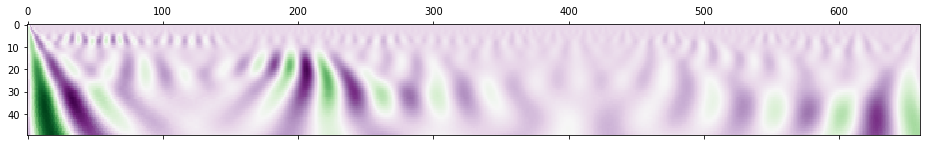

In [38]:
#scales = range(1,661)
scales = range(1,51)
waveletname = 'morl'
train_size = 3456
test_size= 864

#################################################
### plotting CWT of a single TEOAE signal  ######
#################################################
coeff, freq = pywt.cwt(X_train.iloc[3,:], scales, waveletname, 1)
plt.matshow(coeff,  cmap='PRGn', aspect='auto')
plt.show()

In [39]:
scales = range(1,51)
waveletname = 'morl'
train_size = X_train.shape[0]
test_size= X_test.shape[0]

#########################################################
### creating a tensor to store CWT matrices of train egs#
#########################################################
train_data_cwt = np.ndarray(shape=(train_size, 50, 660)) 

for ii in range(0,train_size):
    if ii % 50 == 0: #len(X_train) == 0:
        print(ii)
    signal = X_train.iloc[ii, :]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:660]
    train_data_cwt[ii, :, :] = coeff_
    #train_data_cwt[:, :, ii] = coeff_

###########################################################
### creating a tensor to store CWT matrices of test egs ###
###########################################################
test_data_cwt = np.ndarray(shape=(test_size, 50, 660))

for ii in range(0,test_size):
    if ii % 50 == 0:
        print(ii)
    signal = X_test.iloc[ii, :]
    coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
    coeff_ = coeff[:,:660]
    test_data_cwt[ii, :, :] = coeff_
    #test_data_cwt[:, :, ii] = coeff_

###########################################################
### convert the labels from float to int of train and test egs
###########################################################
labels_train = list(map(lambda x: int(x), np.asarray(y_train)))
labels_test = list(map(lambda x: int(x), np.asarray(y_test)))

###########################################################
### putting all the train and test CWT data             ###
###########################################################
x_train = train_data_cwt
y_train = list(labels_train[:train_size])
x_test = test_data_cwt
y_test = list(labels_test[:test_size])

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250


In [40]:
#Convert the labels to array
y_test_np = np.asarray(y_test)
y_train_np = np.asarray(y_train)

In [41]:
print(np.asarray(x_train).shape)
print(np.asarray(x_test).shape)
print(np.asarray(y_train).shape)
print(np.asarray(y_test).shape)
print(len(x_train))
print(len(x_test))

(3024, 50, 660)
(1296, 50, 660)
(3024,)
(1296,)
3024
1296


In [42]:
train= pd.read_csv('D:/Ear-Stimuli/train_70.csv')
print(train.head())
train=train.drop(['unnamed','session','ear','buffer','block'], axis=1)
print(train.shape)

   unnamed  subject  session   ear buffer  block    data_0    data_1  \
0       40        0        0  left      A     40  0.000062  0.000063   
1       41        0        0  left      A     41  0.000063  0.000064   
2       42        0        0  left      A     42  0.000065  0.000066   
3       43        0        0  left      A     43  0.000065  0.000066   
4       44        0        0  left      A     44  0.000061  0.000062   

     data_2    data_3  ...  data_650  data_651  data_652  data_653  data_654  \
0  0.000064  0.000067  ... -0.000046 -0.000048 -0.000049 -0.000051 -0.000052   
1  0.000065  0.000067  ... -0.000039 -0.000040 -0.000042 -0.000043 -0.000044   
2  0.000067  0.000069  ... -0.000042 -0.000043 -0.000045 -0.000046 -0.000047   
3  0.000067  0.000069  ... -0.000043 -0.000045 -0.000046 -0.000047 -0.000048   
4  0.000063  0.000065  ... -0.000049 -0.000050 -0.000051 -0.000053 -0.000054   

   data_655  data_656  data_657  data_658  data_659  
0 -0.000052 -0.000053 -0.000053 

In [43]:
#loading testing dataset
test= pd.read_csv('D:/Ear-Stimuli/test_70.csv')
print(test.head())
test=test.drop(['unnamed','session','ear','buffer','block'], axis=1)
print(test.shape)

   unnamed  subject  session   ear buffer  block    data_0    data_1  \
0       47        0        0  left      A     47  0.000060  0.000060   
1       48        0        0  left      A     48  0.000066  0.000067   
2       49        0        0  left      A     49  0.000066  0.000066   
3       97        0        0  left      B     47 -0.000039 -0.000039   
4       98        0        0  left      B     48 -0.000044 -0.000044   

     data_2    data_3  ...  data_650  data_651  data_652  data_653  data_654  \
0  0.000061  0.000063  ... -0.000047 -0.000048 -0.000049 -0.000050 -0.000051   
1  0.000068  0.000070  ... -0.000055 -0.000057 -0.000058 -0.000059 -0.000059   
2  0.000067  0.000069  ... -0.000056 -0.000057 -0.000058 -0.000059 -0.000060   
3 -0.000039 -0.000038  ...  0.000032  0.000032  0.000031  0.000030  0.000029   
4 -0.000044 -0.000043  ...  0.000033  0.000033  0.000032  0.000031  0.000030   

   data_655  data_656  data_657  data_658  data_659  
0 -0.000052 -0.000052 -0.000052 

In [44]:
X_train_1d=train.iloc[:,1:661].values
Y_train_1d=train.iloc[:,0:1].values
X_test_1d=test.iloc[:,1:661].values
Y_test_1d=test.iloc[:,0:1].values
#to pass to the CNN
Y_train_1dcnn = keras.utils.to_categorical(Y_train_1d, 54)
Y_test_1dcnn = keras.utils.to_categorical(Y_test_1d, 54)

Y_train_feat=train.iloc[:,0:1].values
Y_test_feat=test.iloc[:,0:1].values

In [45]:
X_train_1d=X_train_1d.reshape(3024,660,1)
print(X_train_1d.shape)
X_test_1d=X_test_1d.reshape(1296,660,1)
print(X_test_1d.shape)

(3024, 660, 1)
(1296, 660, 1)


In [46]:
#Model Construction
# Constructing the CNN model

#1d CNN
in_1D = Input((660,1))
model_1D = Conv1D(32, kernel_size= 5 , strides=1, activation='relu')(in_1D)
model_1D = MaxPooling1D(pool_size= 4, strides=4)(model_1D)
# 2
model_1D = Conv1D(32, kernel_size= 5 , strides=1 , activation='relu')(model_1D)
model_1D = MaxPooling1D(pool_size= 4, strides=4)(model_1D)
# 3
model_1D = Conv1D(64, kernel_size= 5 , strides=1 , activation='relu')(model_1D)
model_1D = MaxPooling1D(pool_size= 4, strides=4)(model_1D)
# 6
model_1D = Conv1D(128, kernel_size= 5 , strides= 1 , activation='relu')(model_1D)
model_1D = MaxPooling1D(pool_size= 2, strides= 2)(model_1D)
model_1D = Flatten()(model_1D)

#2dcnn
in_2D = Input((50, 660, 1))
model_2D = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(in_2D)
model_2D = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D)
model_2D = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D)
model_2D = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D)
model_2D = Conv2D(32, kernel_size=(3, 3) , strides=(1,1), activation='relu')(model_2D)
model_2D = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(model_2D)
model_2D = Flatten()(model_2D)


#concat
merged = Concatenate()([model_1D, model_2D])
#output = Flatten()(merged)
model_final = Model(inputs=[in_1D, in_2D], outputs=[merged])


In [47]:
model_final.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
print(model_final.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 660, 1)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 656, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 164, 32)      0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 50, 660, 1)   0                                            
____________________________________________________________________________________________

In [ ]:
from keras.utils import plot_model
plot_model(model_final, to_file='model_final.png')

In [51]:
x_train_cnn = x_train.reshape(3024,50,660,1)
x_test_cnn = x_test.reshape(1296,50,660,1)
#training
features_xtrain=model_final.predict([X_train_1d,x_train_cnn]) #training
print(features_xtrain.shape)

(3024, 46912)


In [52]:
#Testing
features_xtest=model_final.predict([X_test_1d,x_test_cnn]) 
features_xtest.shape

(1296, 46912)

In [53]:
# PCA on the flattened array

scaler = StandardScaler()
scaler.fit(features_xtrain)

features_xtrain = scaler.transform(features_xtrain)
features_xtest = scaler.transform(features_xtest)

pca = PCA(.95)  #using 95% of the variance in the model.

pca.fit(features_xtrain)

features_xtrain = pca.transform(features_xtrain)
features_xtest = pca.transform(features_xtest)

In [54]:
print(features_xtrain.shape)
print(features_xtest.shape)

(3024, 317)
(1296, 317)


In [55]:
 #SVM classifier

svm=SVC()
svm.fit(features_xtrain,y_train_np)

#training accuracy
acc_svm_train=round(svm.score(features_xtrain,y_train_np)*100,2)
print("Training Accuracy:",acc_svm_train)

#testing accuracy
acc_svm_test=round(svm.score(features_xtest,y_test_np)*100,2)
print("Testing accuracy:",acc_svm_test)

Training Accuracy: 99.01
Testing accuracy: 97.99


In [56]:
# MLP classification
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,150,100), max_iter=50, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=0,tol=0.000001)
mlp_clf.fit(features_xtrain, y_train_np)

pred_test = mlp_clf.predict(features_xtest) #testing accuracy
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

Iteration 1, loss = 5.04779997
Iteration 2, loss = 1.24361671
Iteration 3, loss = 0.33701882
Iteration 4, loss = 0.08556900
Iteration 5, loss = 0.03648537
Iteration 6, loss = 0.02316947
Iteration 7, loss = 0.01313588
Iteration 8, loss = 0.00922177
Iteration 9, loss = 0.00674787
Iteration 10, loss = 0.00525424
Iteration 11, loss = 0.00444103
Iteration 12, loss = 0.00378426
Iteration 13, loss = 0.00332337
Iteration 14, loss = 0.00292162
Iteration 15, loss = 0.00261669
Iteration 16, loss = 0.00233889
Iteration 17, loss = 0.00211208
Iteration 18, loss = 0.00191973
Iteration 19, loss = 0.00175481
Iteration 20, loss = 0.00161416
Iteration 21, loss = 0.00149212
Iteration 22, loss = 0.00138666
Iteration 23, loss = 0.00128850
Iteration 24, loss = 0.00120652
Iteration 25, loss = 0.00112887
Iteration 26, loss = 0.00106366
Iteration 27, loss = 0.00100035
Iteration 28, loss = 0.00094523
Iteration 29, loss = 0.00089481
Iteration 30, loss = 0.00085144
Iteration 31, loss = 0.00080746
Iteration 32, los

C:\Users\harsh\.conda\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
#Random Forest Classifier

# Create the model with 100 trees
model_rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_rf.fit(features_xtrain, y_train_np)
pred_test = model_rf.predict(features_xtest) #testing accuracy

print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

Accuracy: 
99.84567901234568
Confusion Matrix :
[[22  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 29]]
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        19
          13       1.00      

In [58]:
# K nearest neighbours algorithm 

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(features_xtrain, y_train_np) 
pred_test = knn.predict(features_xtest) #testing accuracy
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

Accuracy: 
99.76851851851852
Confusion Matrix :
[[22  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 29]]
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        19
          13       1.00      

In [59]:
# XGBoost classifier

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(features_xtrain, y_train_np)
pred_test = model.predict(features_xtest) #testing accuracy
print('Accuracy: ')
print(accuracy_score(y_test_np, pred_test)*100)
print('Confusion Matrix :')
print(confusion_matrix(y_test_np, pred_test)) 
print('Report : ')
print(classification_report(y_test_np, pred_test))

Accuracy: 
99.53703703703704
Confusion Matrix :
[[22  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 29]]
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        19
          13       1.00      